# Basics of Deep Learning

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import random
import numpy as np
import time
from keras.datasets import mnist

<a name="realworld_dataset"></a>
# MNIST dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

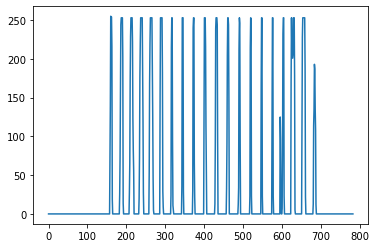

In [4]:
plt.plot(test_data[127,:].reshape(28 * 28))

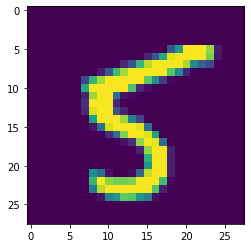

In [5]:
plt.imshow(test_data[127,:])

# Simple classifier on MNIST

## Prepare the data

In [6]:
train_data = train_data.reshape(train_data.shape[0], 28 * 28)
test_data = test_data.reshape(test_data.shape[0], 28 * 28)

Let's first shuffle the data. 

In [7]:
import random

In [8]:
train_indexes = np.arange(len(train_data))
print(train_indexes)

[    0     1     2 ... 59997 59998 59999]


In [9]:
random.shuffle(train_indexes)
print(train_indexes)

[22368 38937 36367 ... 24247 20402 34811]


Shuffled the training dataset.

In [10]:
train_X = train_data[train_indexes]
train_Y = train_labels[train_indexes]

We do the same for the test set

In [11]:
test_indexes = np.arange(len(test_data))
random.shuffle(test_indexes)

For simplicity, we use 1000 samples:

In [12]:
test_indexes = test_indexes[:1000]

In [13]:
test_X = test_data[test_indexes]
test_Y = test_labels[test_indexes]

In [14]:
print(test_X.shape)

(1000, 784)


In [15]:
np.unique(test_Y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

## Train a kNN

Let's get a classifier of our choice (e.g. kNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
clf = KNeighborsClassifier()

In [18]:
start_time = time.time()

clf.fit(train_X, train_Y)

print('Elapsed time:', time.time() - start_time, 'seconds')

Elapsed time: 38.642250299453735 seconds


In [ ]:
start_time = time.time()
accuracy = clf.score(test_X, test_Y)
print('accuracy: {:.3f} in {:.1f}s'.format(accuracy, time.time() - start_time))

## Confusion matrix

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
mat = confusion_matrix(test_Y, y_pred)

In [ ]:
plt.figure(figsize=(6,6))
plt.imshow(mat)

# Deep Neural Network

We will be using Keras, a python deep learning library, with a high-level API that makes it easy to test things in deep learning. 

Check the website: https://keras.io/ 

In [ ]:
import keras

## Prepare data

First, prepare the data for deep learning. Normalise data: 

In [ ]:
train_X = train_data[train_indexes] / 255.0
test_X = test_data[test_indexes] / 255.0

In [ ]:
train_Y = train_labels[train_indexes]
test_Y = test_labels[test_indexes]

In [ ]:
print(train_X.shape, test_X.shape)

Define a set of validation data, for instance, taking a random split of 10% of the training set. Since we have already randomized the trainin set, we can just keep the first 90% for the train set, and leave the last 10% for the validation set.

In [ ]:
train_X = train_data[train_indexes][:int(0.9 * len(train_data[train_indexes]))]
train_Y = train_labels[train_indexes][:int(0.9 * len(train_labels[train_indexes]))]

In [ ]:
print(train_X.shape)

In [ ]:
valid_X = train_data[train_indexes][int(0.9 * len(train_data[train_indexes])):len(train_data[train_indexes])]
valid_Y = train_labels[train_indexes][int(0.9 * len(train_labels[train_indexes])):len(train_labels[train_indexes])]

In [ ]:
print(valid_X.shape)

Labels need to be vectorized such that label `3` out of `10` classes means a vector of size  `10` filled with `0` except at cell `3`, set to `1`. 

In [ ]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

In [ ]:
print(train_Y.shape)

In [ ]:
train_labels[train_indexes][1231]

In [ ]:
train_Y[1231,:]

In [ ]:
num_classes = train_Y.shape[1]

## Build your first neural network

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

![dnn1](./assets/dnn1.png)

In [ ]:
model = Sequential()

We have to specify the `input_shape`, which the dimension of the input observations, here `784`:

In [ ]:
input_shape = train_X.shape[1:]

In [ ]:
model.add(Dense(num_classes, activation='softmax', input_shape=input_shape))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.fit(train_X, train_Y,
          batch_size=64,
          epochs=1)

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

What can we do to improve?

In [ ]:
model.fit(train_X, train_Y,
          batch_size=64,
          epochs=1)

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

How can we see if the network is learning something? 

### History

In [ ]:
model = Sequential()
model.add(Dense(num_classes, 
                activation='softmax', 
                input_shape=input_shape))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_Y,
          batch_size=64,
          epochs=20,
          verbose=1)

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

In [ ]:
history.history

In [ ]:
hist = history.history

In [ ]:
plt.plot(hist['loss'], label='training')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Validation set

In [ ]:
model = Sequential()
model.add(Dense(num_classes, 
                activation='softmax', 
                input_shape=input_shape))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, 
                    train_Y,
                    batch_size=64,
                    epochs=20,
                    verbose=1,
                    validation_data=(valid_X, valid_Y))

In [ ]:
hist = history.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

### Used to spot overfitting

## Adding a layer

![dnn1](./assets/dnn2.png)

In [ ]:
model = Sequential()

model.add(Dense(256, activation='relu', input_shape=input_shape))

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
log = model.fit(train_X, train_Y,
                batch_size=64,
                epochs=10,
                verbose=1,
                validation_data=(valid_X, valid_Y))

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

In [ ]:
hist = log.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

We can always the confusion matrix:

In [ ]:
y_pred = model.predict(test_X)

In [ ]:
mat = confusion_matrix(np.argmax(test_Y, axis=1), np.argmax(y_pred, axis=1))

In [ ]:
plt.imshow(mat)

## Adding other layers

In [ ]:
model = Sequential()

model.add(Dense(1024, activation='relu', input_shape=input_shape))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
log = model.fit(train_X, train_Y,
          batch_size=64,
          epochs=10,
          verbose=1,
          validation_data=(valid_X, valid_Y))

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss: {:.3f}'.format(score[0]))
print('Test accuracy: {:.3f}'.format(score[1]))

# Convolutional Neural Network

In [ ]:
from keras.layers import Conv2D

### Change dimensions to "images"

In [ ]:
train_split = int(0.9 * len(train_data[train_indexes]))

In [ ]:
train_X = train_data[train_indexes][:train_split] / 255.0
train_Y = train_labels[train_indexes][:train_split]

valid_X = train_data[train_indexes][train_split:] / 255.0
valid_Y = train_labels[train_indexes][train_split:]

test_X = test_data[test_indexes] / 255.0
test_Y = test_labels[test_indexes]

In [ ]:
print(train_X.shape, valid_X.shape, test_X.shape)

In [ ]:
train_X = train_X.reshape(54000, 28, 28, 1)
valid_X = valid_X.reshape(6000, 28, 28, 1)
test_X = test_X.reshape(1000, 28, 28, 1)

In [ ]:
print(train_X.shape, valid_X.shape, test_X.shape)

In [ ]:
train_Y = keras.utils.to_categorical(train_Y, 10)
valid_Y = keras.utils.to_categorical(valid_Y, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

In [ ]:
print(train_Y.shape, valid_Y.shape, test_Y.shape)

In [ ]:
input_shape = train_X.shape[1:]

### Define ConvNet

One layer conv:

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [ ]:
print(model.summary())

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
log = model.fit(train_X, train_Y,
                batch_size=64,
                epochs=10,
                verbose=1,
                validation_data=(valid_X, valid_Y))

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
hist = log.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [ ]:
log = model.fit(train_X, train_Y,
                batch_size=64,
                epochs=5,
                verbose=1,
                validation_data=(valid_X, valid_Y))

In [ ]:
score = model.evaluate(test_X, test_Y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
hist = log.history
plt.plot(hist['loss'], label='training')
plt.plot(hist['val_loss'], label='validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

___
About this exercise material: copyright Baptiste Caramiaux (write me for any questions or use of this material [email](mailto:baptiste.caramiaux@lri.fr))
___